# Explore here

In [21]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import matplotlib.pyplot as plt

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()



True

In [6]:
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [ ]:
lz_uri = 'spotify:artist:4IS4EyXNmiI2w5SRCjMtEF'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

results = spotify.artist_top_tracks(lz_uri)

print(results)

{'tracks': [{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4IS4EyXNmiI2w5SRCjMtEF'}, 'href': 'https://api.spotify.com/v1/artists/4IS4EyXNmiI2w5SRCjMtEF', 'id': '4IS4EyXNmiI2w5SRCjMtEF', 'name': 'Kendji Girac', 'type': 'artist', 'uri': 'spotify:artist:4IS4EyXNmiI2w5SRCjMtEF'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 'PL', 'PT', 'SG', 'SK', 'ES', 'SE', 'CH', 'TW', 'TR', 'UY', 'US', 'GB', 'AD', 'LI', 'MC', 'ID', 'JP', 'TH', 'VN', 'RO', 'IL', 'ZA', 'SA', 'AE', 'BH', 'QA', 'OM', 'KW', 'EG', 'MA', 'DZ', 'TN', 'LB', 'JO', 'PS', 'IN', 'KZ', 'MD', 'UA', 'AL', 'BA', 'HR', 'ME', 'MK', 'RS', 'SI', 'KR', 'BD', 'PK', 'LK', 'GH', 'KE', 'NG', 'TZ', 'UG', 'AG', 'AM', 'BS', 'BB', 'BZ', 'BT', 'BW', 'BF', 'C

In [16]:
artist_id = "4IS4EyXNmiI2w5SRCjMtEF"

top_tracks = spotify.artist_top_tracks(artist_id, country='US')

# Print only the track name and some other details
for track in top_tracks['tracks'][:10]:
    print(f"Track Name: {track['name']}")
    print(f"Album Name: {track['album']['name']}")
    print(f"Artists: {', '.join([artist['name'] for artist in track['artists']])}")
    print("-" * 20)

Track Name: Si seulement...
Album Name: Vivre...
Artists: Kendji Girac
--------------------
Track Name: Andalouse
Album Name: Kendji
Artists: Kendji Girac
--------------------
Track Name: Le feu
Album Name: L'école de la vie
Artists: Kendji Girac, Vianney
--------------------
Track Name: Bebeto
Album Name: Mi Vida (Edition de Noël)
Artists: Kendji Girac, Soolking
--------------------
Track Name: Dans mes bras
Album Name: Mi Vida (Edition de Noël)
Artists: Kendji Girac, Dadju
--------------------
Track Name: Tiago
Album Name: Amigo
Artists: Kendji Girac
--------------------
Track Name: Dernier métro
Album Name: Mi Vida (Edition de Noël)
Artists: Kendji Girac, GIMS
--------------------
Track Name: No Me Mires Más
Album Name: Ensemble (Deluxe Version)
Artists: Kendji Girac, Soprano
--------------------
Track Name: Les yeux de la mama
Album Name: Ensemble (Deluxe Version)
Artists: Kendji Girac
--------------------
Track Name: Baila
Album Name: Sans visa
Artists: Soolking, Kendji Girac
----

In [17]:
for track in top_tracks['tracks'][:10]:
    track_name = track['name']
    popularity = track['popularity']
    duration_ms = track['duration_ms']
    duration_min = duration_ms / (60 * 1000)  # Convert milliseconds to minutes

    print(f"Track Name: {track_name}")
    print(f"Popularity: {popularity}")
    print(f"Duration (minutes): {duration_min:.2f}")  # Format to 2 decimal places
    print("-" * 20)

Track Name: Si seulement...
Popularity: 58
Duration (minutes): 2.95
--------------------
Track Name: Andalouse
Popularity: 37
Duration (minutes): 2.79
--------------------
Track Name: Le feu
Popularity: 57
Duration (minutes): 3.95
--------------------
Track Name: Bebeto
Popularity: 56
Duration (minutes): 3.42
--------------------
Track Name: Dans mes bras
Popularity: 55
Duration (minutes): 3.27
--------------------
Track Name: Tiago
Popularity: 54
Duration (minutes): 2.98
--------------------
Track Name: Dernier métro
Popularity: 54
Duration (minutes): 3.72
--------------------
Track Name: No Me Mires Más
Popularity: 53
Duration (minutes): 4.18
--------------------
Track Name: Les yeux de la mama
Popularity: 52
Duration (minutes): 3.37
--------------------
Track Name: Baila
Popularity: 52
Duration (minutes): 2.42
--------------------


In [19]:
track_data = []
for track in top_tracks['tracks']:
    track_data.append({
        'name': track['name'],
        'popularity': track['popularity'],
        'duration_ms': track['duration_ms']
    })

df = pd.DataFrame(track_data)


df_sorted = df.sort_values(by=['popularity'], ascending=True)

df_sorted


,name,popularity,duration_ms
1,Andalouse,37,167373
8,Les yeux de la mama,52,202480
9,Baila,52,145066
7,No Me Mires Más,53,250866
5,Tiago,54,178786
6,Dernier métro,54,223013
4,Dans mes bras,55,196480
3,Bebeto,56,205400
2,Le feu,57,237160
0,Si seulement...,58,177013


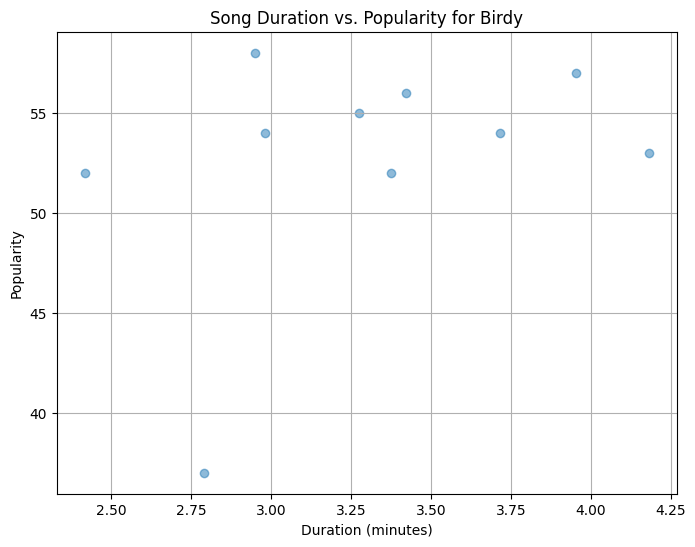

In [22]:
df['duration_min'] = df['duration_ms'] / (60 * 1000)


plt.figure(figsize=(8, 6))
plt.scatter(df['duration_min'], df['popularity'], alpha=0.5)
plt.title('Song Duration vs. Popularity for Birdy')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()